### Definición matemática  
> En estadística, la regresión lineal o ajuste lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y, m variables independientes X_i y un término aleatorio.

Ejemplo: Queremos comprar una vivienda, y empezamos a registrar el número de habitaciones junto a su precio. Así podríamos estimar el valor aproximado de una casa sabiendo el número de habitaciones.
A eso se le llama **regresión lineal simple**, ya que se involucran solamente 1 variable independiente. Donde su modelo es el siguiente

> y = W0 + W1X1

Para ese tipo de regresión, calculamos el promedio de los datos arrojados por la variable independiente, y ajustamos sus puntos con ellos, calculando así un *error* entre cada dato.

Por otro lado, en el mundo real solemos tener más de una variable a tomar en cuenta. Siguiendo con nuestro ejemplo de vivienda, tendríamos que agregar *el grado de criminalidad* o la *cercania a los centros comerciales*. Aquí ya no tendríamos un modelo de regresión lineal simple, porque tendríamos más de una varible.
En su lugar tendríamos un **modelo de regresión lineal multiple** Nuestro modelo sería igual al de regresión simple, pero ahora teniendo más variables, lo que lo volvería multidimesional 

> y = W0 + W1X1 + W2X2 ...WnXn

Esto suele representarse de forma vectorial, generando matrices para representar cada uno de nuestros datos de entrada (Habitaciones, criminalidad, etc). Eso sería nuestra variabla **x** y también podemos generar nuestro conjunto de elementos que queremos modelar llamado **Y** Y por último hacemos lo mismo para las variables, para nuestro vector de parametros **W** 

> Por lo cual ahora tenemos Y = WX como ecuación vectorial

### Calculo por minimos cuadrados ordinarios

Recuperamos el concepto usado previamente, el **error**. Este concepto es la diferencia entre el valor estimado y el valor real
> error = valor real - valor estimado

Aunque claro, no estamos tratando unicamente con un punto, sino con mucho puntos. Podríamos simplemente sacar la *media* de todos los valores, sin embargo, para fines de este método elevaremos el error al cuadrado. Al cuadrado de nuestros errores si le sacamos la media y a eso se le denomida **error cuadrático medio**

Nuestro objetivo es encontrar el **mínimo error cuadrático medio**, así que tomaremos la deducción de la formula que alguien más hizo y la utilizaremos en nuestros modelos
> W = (X^tX)⁻¹X^tY

Así nosotros solo nos enfocamos en obtener nuestras matrices

Existen otros modelos para la regresión linear, como por ejemplo un método iterativo llamado descenso de gradiente, los cuales podríamos ver próximamente.




## Obtener regresión lineal con Python

**Ejercicio**
Tenemos un dataset sobre artículos publicados, predeciremos el número de veces que se compartira x artículo tomando como variable x = numero de palabras

In [3]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Importamos los datos de entrada
articles_dataset = pd.read_csv("./articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
articles_dataset.shape

(161, 8)

In [7]:
articles_dataset.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [8]:
# Ahora veamos algunas estadísticas de nuestros datos
articles_dataset.describe() #<== Ojo en describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


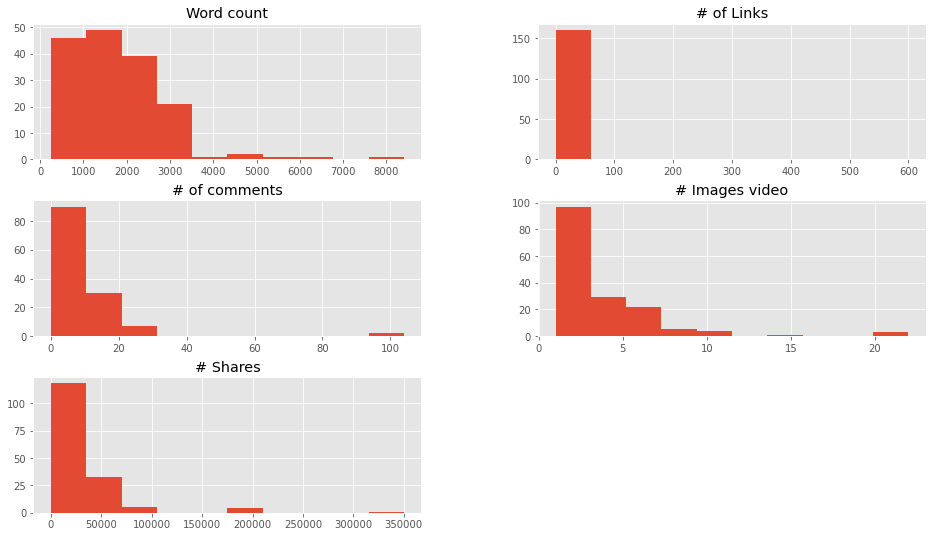

In [10]:

# Visualizamos rápidamente las caraterísticas de entrada
articles_dataset.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

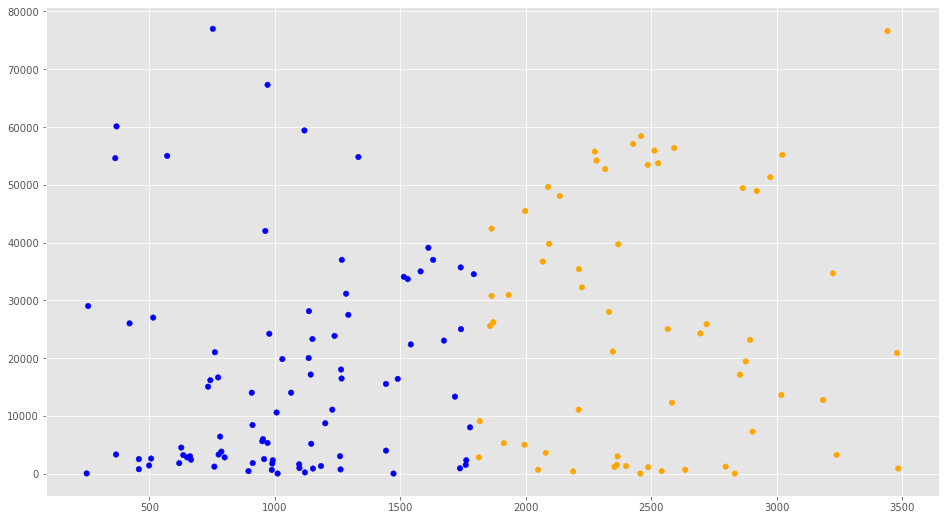

In [11]:
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = articles_dataset[(articles_dataset['Word count'] <= 3500) & (articles_dataset['# Shares'] <= 80000)]

colors=['orange','blue']
size=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asign=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asign.append(colors[0])
    else:
        asign.append(colors[1])

plt.scatter(f1, f2, c=asign, s=size[0])
plt.show()

In [12]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


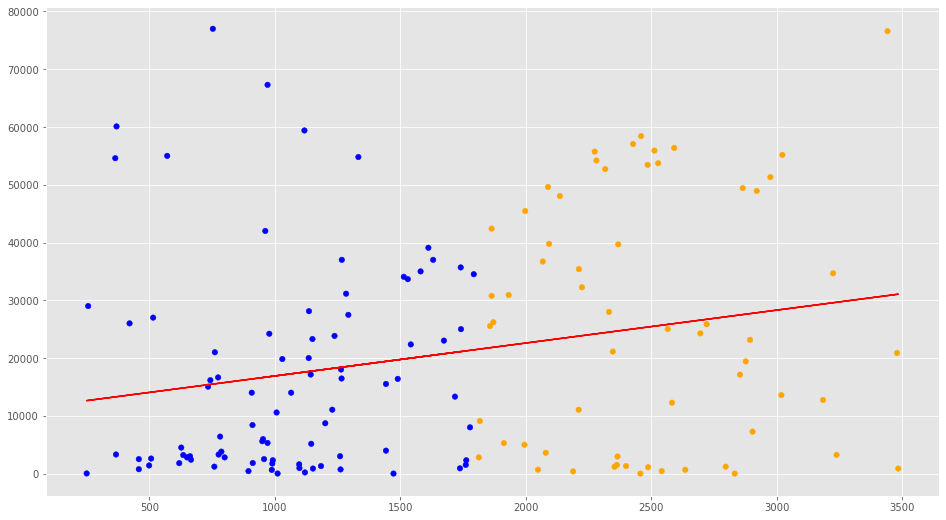

In [17]:
plt.scatter(f1, f2, c=asign, s=size[0])
plt.plot(dataX, y_pred, color='red')


In [13]:

#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595
22595
